<a href="https://colab.research.google.com/github/spexdj/Data-Science-III-NLP-Deep-Learning-aplicado-a-Ciencia-de-Datos/blob/main/ProyectoFinal_DataScienceIII_HernanLicastro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìå 1. Descripci√≥n del Problema de Negocio
##Problema:
En una ciudad tan competitiva y diversa como Atlanta, los due√±os de restaurantes enfrentan el desaf√≠o de comprender c√≥mo perciben los clientes sus servicios y productos a partir de las rese√±as en l√≠nea. Sin un an√°lisis adecuado del contenido textual de las opiniones, resulta dif√≠cil identificar patrones de satisfacci√≥n o insatisfacci√≥n que podr√≠an guiar decisiones estrat√©gicas, como mejoras en la atenci√≥n, cambios de men√∫, precios o decoraci√≥n.

#üéØ 2. Objetivo General
Analizar las rese√±as de clientes de restaurantes en Atlanta mediante t√©cnicas de procesamiento de lenguaje natural (NLP), con el fin de detectar patrones en los comentarios, identificar sentimientos predominantes y extraer informaci√≥n clave que pueda ser √∫til para la toma de decisiones en la industria gastron√≥mica local.

#üìö 3. Origen de los Datos
Los datos fueron obtenidos desde la plataforma Kaggle: https://www.kaggle.com/datasets/grohith/atlanta-restaurant-reviews

#üìä 4. Definici√≥n de Variables
Estas son las variables m√°s relevantes del dataset:

Descripci√≥n

*   ID: N√∫mero de review
*   nombre_restaurant: Nombre del restaurante
*   categoria_restaurant:	Categor√≠as de los restaurants
*   web_restaurant:	Sitio web de los restaurants
*   url_google:	Link de google maps de los restaurants
*   Longitud:	Dato de Longitud del restaurant
*   Latitud: Dato de la Latitud del restaurant
*   puntaje: Puntaje del review del restaurant
*   texto_review:	Texto de la rese√±a


#üß™ 5. Cargar datos y procesamiento de texto (NLP paso a paso)

In [ ]:
!pip install openpyxl nltk wordcloud textblob

# Importaci√≥n de librer√≠as
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
from textblob import TextBlob

# Descarga de recursos necesarios de NLTK
nltk.download('punkt')        # Tokenizaci√≥n
nltk.download('stopwords')    # Palabras vac√≠as (stopwords)
nltk.download('wordnet')      # Lematizaci√≥n

# Lectura del archivo Excel desde GitHub (REVISAR: usar 'raw' en la URL)
url = "https://github.com/spexdj/Data-Science-III-NLP-Deep-Learning-aplicado-a-Ciencia-de-Datos/raw/main/Dataset_Atlanta_Restaurants_Reviews.xlsx"
df = pd.read_excel(url)

# Mostrar nombres de columnas y primeras filas para verificar
print("Columnas del dataset:")
print(df.columns)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Columnas del dataset:
Index(['ID', 'nombre_restaurant', 'categoria_restaurant', 'web_restaurant',
       'url_google', 'longitud', 'latitud', 'puntaje', 'texto_review'],
      dtype='object')


ID nombre_restaurant categoria_restaurant  \
0   1      The Optimist   Seafood restaurant   
1   2      The Optimist   Seafood restaurant   
2   3      The Optimist   Seafood restaurant   
3   4      The Optimist   Seafood restaurant   
4   5      The Optimist   Seafood restaurant   

                           web_restaurant  \
0  https://www.theoptimistrestaurant.com/   
1  https://www.theoptimistrestaurant.com/   
2  https://www.theoptimistrestaurant.com/   
3  https://www.theoptimistrestaurant.com/   
4  https://www.theoptimistrestaurant.com/   

                                        url_google   longitud    latitud  \
0  https://www.google.com/maps/place/The+Optimist/  33.779814 -84.410451   
1  https://www.google.com/maps/place/The+Optimist/  33.779814 -84.410451   
2  https://www.google.com/maps/place/The+Optimist/  33.779814 -84.410451   
3  https://www.google.com/maps/place/The+Optimist/  33.779814 -84.410451   
4  https://www.google.com/maps/place/The+Optimist/  33.779814 -84.410451   

   puntaje                                       texto_review  
0        5  One word amazing!! The red fish,  halibut,  fr...  
1        5  First time here and the food is great and the ...  
2        5  I recently had the pleasure of dining at Optim...  
3        5  Beautiful atmosphere and delicious food. All o...  
4        5  We had a wonderful dinner at the Optimist. Our...

#6. Limpieza y preprocesamiento del texto

In [ ]:
# Copiamos el texto original para no modificar la columna original
df['clean_review'] = df['texto_review'].astype(str)

# Eliminamos s√≠mbolos, puntuaci√≥n y caracteres especiales
# Esto elimina comas, signos de exclamaci√≥n, puntos, etc.
df['clean_review'] = df['clean_review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

#7. Tokenizaci√≥n

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Tokenizaci√≥n: convertimos el texto en una lista de palabras individuales
df['tokens'] = df['clean_review'].apply(word_tokenize)

#8. Pasar palabras a min√∫sculas

In [ ]:
# Convertimos todas las palabras a min√∫sculas para evitar duplicados como "Food" y "food"
df['tokens'] = df['tokens'].apply(lambda x: [word.lower() for word in x])

#9. Eliminarmos Stopwords

In [ ]:
# Eliminamos las stopwords (palabras muy comunes como "the", "is", "and")
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

#10. Lematizaci√≥n

In [ ]:
# Lematizaci√≥n: reducimos las palabras a su forma base (ej: "running" -> "run")
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
# Vista previa de los tokens procesados
df[['texto_review', 'tokens']].head()

texto_review  \
0  One word amazing!! The red fish,  halibut,  fr...   
1  First time here and the food is great and the ...   
2  I recently had the pleasure of dining at Optim...   
3  Beautiful atmosphere and delicious food. All o...   
4  We had a wonderful dinner at the Optimist. Our...   

                                              tokens  
0  [one, word, amazing, red, fish, halibut, fried...  
1      [first, time, food, great, waiter, excellent]  
2  [recently, pleasure, dining, optimist, atlanta...  
3  [beautiful, atmosphere, delicious, food, food,...  
4  [wonderful, dinner, optimist, group, 9, great,...

#‚òÅÔ∏è 11. Nube de Palabras (Word Cloud)

##Nube de Palabras General

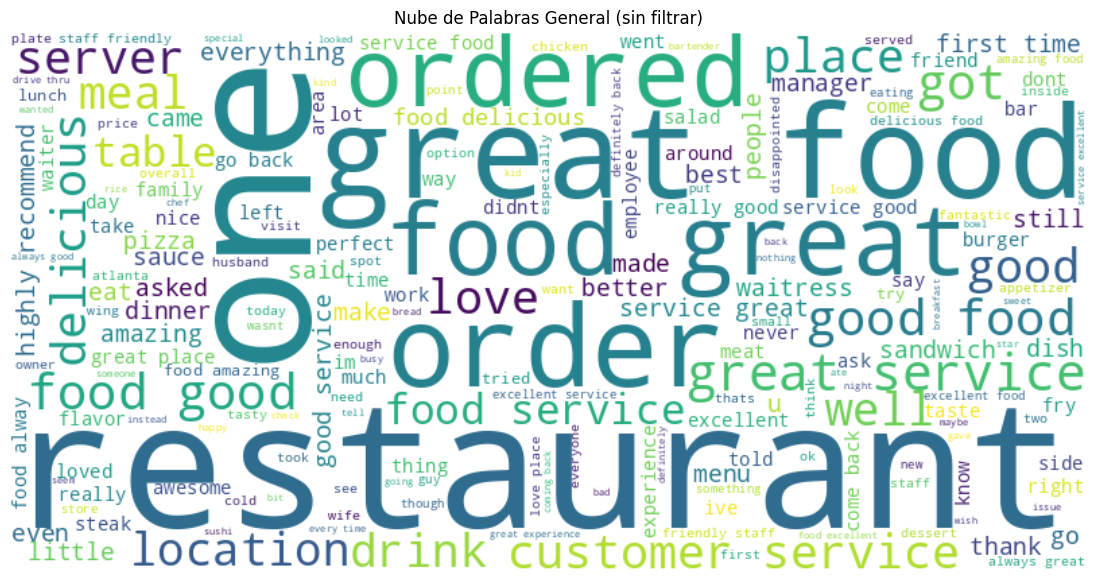

In [ ]:
# Generamos un solo string con todas las palabras de todos los reviews
all_words = ' '.join([' '.join(tokens) for tokens in df['tokens']])

# Creamos la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Mostramos la nube de palabras general
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras General (sin filtrar)")
plt.show()

##Nube de Palabras Filtrada

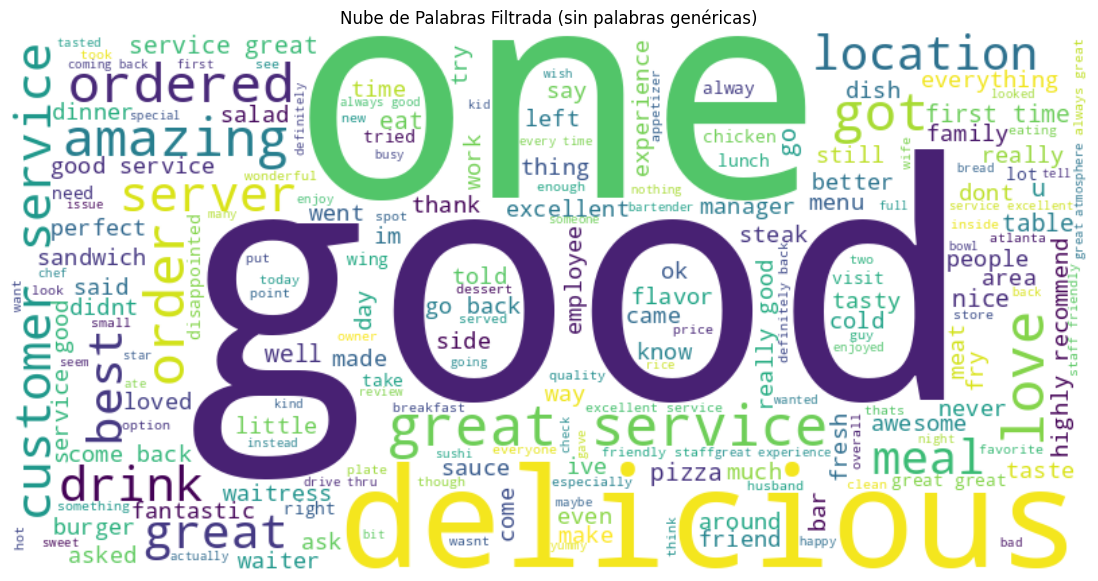

In [ ]:
# Creamos una segunda nube filtrando palabras gen√©ricas como "food" o "restaurant"
palabras_a_ignorar = ['food', 'restaurant', 'place']
palabras_filtradas = [word for word in all_words.split() if word not in palabras_a_ignorar]

# Nueva nube sin palabras comunes
wordcloud_filtrado = WordCloud(width=800, height=400, background_color='white').generate(' '.join(palabras_filtradas))

# Mostramos la nube de palabras filtrada
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_filtrado, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras Filtrada (sin palabras gen√©ricas)")
plt.show()

La nube de palabras generada a partir de las rese√±as permite identificar los t√©rminos m√°s frecuentemente utilizados por los clientes en sus comentarios sobre restaurantes en Atlanta. Tras filtrar palabras gen√©ricas como "restaurant" o "food", emergen con claridad adjetivos y sustantivos como ‚Äúdelicious‚Äù, ‚Äúgood‚Äù, ‚Äúone‚Äù, ‚Äúcustomer‚Äù, ‚Äúservice‚Äù, ‚Äúserver‚Äù y ‚Äúordered‚Äù.

Esto sugiere que las opiniones se enfocan principalmente en la calidad de la comida, la experiencia del cliente, y la atenci√≥n del personal. La fuerte presencia de t√©rminos positivos como ‚Äúdelicious‚Äù, ‚Äúexcellent‚Äù y ‚Äúamazing‚Äù refuerza la percepci√≥n general favorable de los restaurantes en el dataset, lo cual est√° en l√≠nea con los resultados del an√°lisis de sentimientos realizado posteriormente.

Este tipo de visualizaci√≥n resulta √∫til para identificar r√°pidamente los conceptos m√°s valorados por los usuarios, facilitando decisiones estrat√©gicas en comunicaci√≥n, servicio y marketing gastron√≥mico.

#üî¢12. N-gramas (ej. Bigramas)

In [ ]:
# üîó Extraemos bigramas: combinaciones de 2 palabras que aparecen juntas
bigramas = []
for tokens in df['tokens']:
    bigramas += list(ngrams(tokens, 2))

# üîù Mostramos los 10 bigramas m√°s frecuentes
conteo_bigrams = Counter(bigramas).most_common(10)

print("Top 10 bigramas m√°s comunes:")
for bigram, freq in conteo_bigrams:
    print(f"{bigram}: {freq}")

Top 10 bigramas m√°s comunes:
('great', 'food'): 3782
('great', 'service'): 2781
('food', 'great'): 2618
('good', 'food'): 2575
('food', 'good'): 2504
('customer', 'service'): 2372
('food', 'service'): 1943
('first', 'time'): 1847
('service', 'great'): 1586
('highly', 'recommend'): 1393


##Graficamos el N-Grama

<ipython-input-12-6418bff01d83>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bigrams, x='frecuencia', y='bigram', palette='viridis')


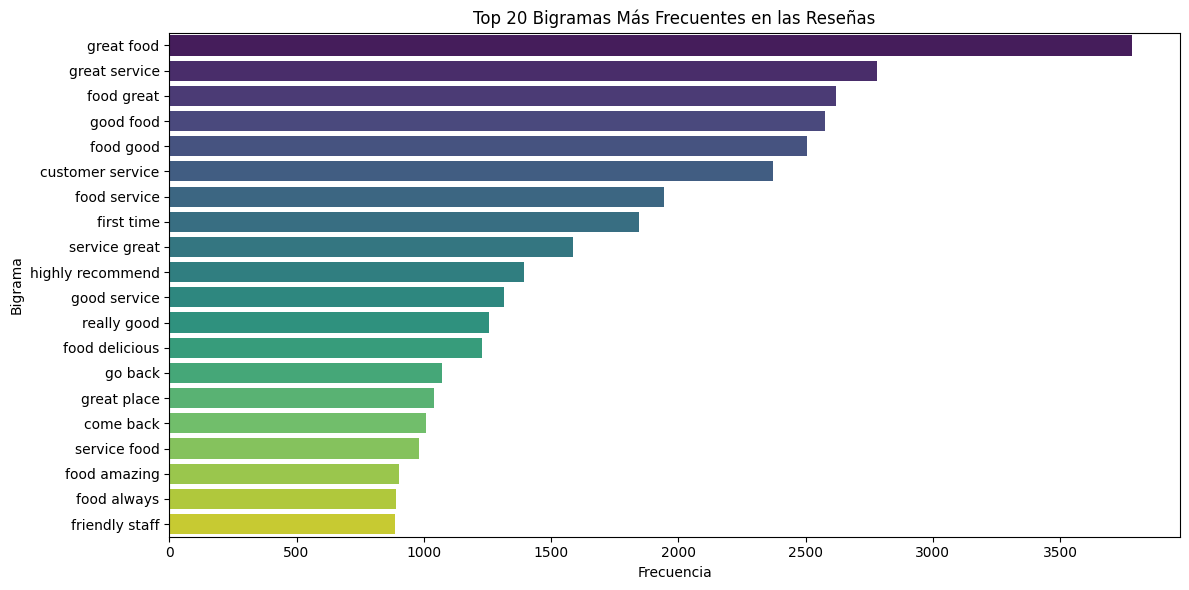

In [ ]:
import seaborn as sns

# 1Ô∏è‚É£ Repetimos el proceso de generaci√≥n de bigramas
from nltk.util import ngrams
from collections import Counter

# Generar lista de bigramas
bigramas = []
for tokens in df['tokens']:
    bigramas += list(ngrams(tokens, 2))

# Contar los 20 bigramas m√°s comunes
conteo_bigrams = Counter(bigramas).most_common(20)

# 2Ô∏è‚É£ Convertir a DataFrame para graficar
df_bigrams = pd.DataFrame(conteo_bigrams, columns=['bigram', 'frecuencia'])
df_bigrams['bigram'] = df_bigrams['bigram'].apply(lambda x: ' '.join(x))  # unir palabras

# 3Ô∏è‚É£ Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=df_bigrams, x='frecuencia', y='bigram', palette='viridis')
plt.title("Top 20 Bigramas M√°s Frecuentes en las Rese√±as")
plt.xlabel("Frecuencia")
plt.ylabel("Bigrama")
plt.tight_layout()
plt.show()

El an√°lisis de bigramas revela las combinaciones de palabras m√°s comunes en los comentarios de los clientes. Entre las expresiones m√°s repetidas se destacan ‚Äúgreat food‚Äù, ‚Äúgreat service‚Äù, ‚Äúfood great‚Äù, y ‚Äúcustomer service‚Äù, lo cual refuerza el enfoque positivo de las rese√±as y coincide con lo observado en la nube de palabras y el an√°lisis de sentimiento.

Tambi√©n aparecen frases como ‚Äúfirst time‚Äù, ‚Äúhighly recommend‚Äù, y ‚Äúgo back‚Äù, lo que indica menciones frecuentes a primeras experiencias satisfactorias y recomendaciones expl√≠citas. Estos hallazgos sugieren que la calidad del alimento y del servicio, junto con la intenci√≥n de volver, son pilares clave en la experiencia del cliente en los restaurantes analizados.

Este tipo de an√°lisis proporciona informaci√≥n valiosa sobre los aspectos que los clientes valoran y verbalizan con mayor frecuencia, pudiendo ser utilizados para potenciar estrategias de fidelizaci√≥n y diferenciaci√≥n en el mercado gastron√≥mico.

#üòä 13. An√°lisis de Sentimiento

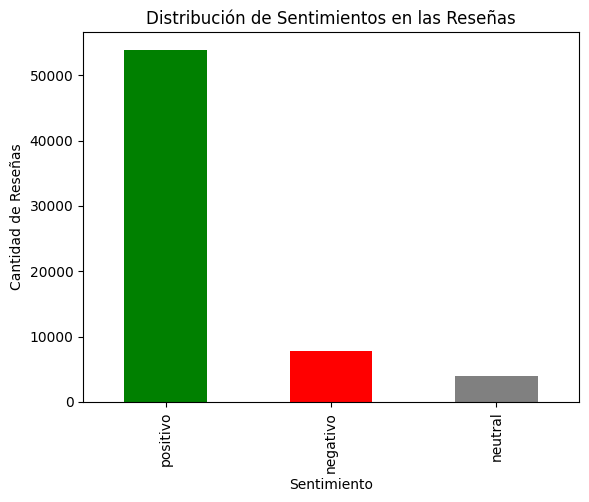

texto_review  sentiment  \
0  One word amazing!! The red fish,  halibut,  fr...   0.100000   
1  First time here and the food is great and the ...   0.683333   
2  I recently had the pleasure of dining at Optim...   0.448413   
3  Beautiful atmosphere and delicious food. All o...   0.350833   
4  We had a wonderful dinner at the Optimist. Our...   0.933333   

  sentiment_label  
0        positivo  
1        positivo  
2        positivo  
3        positivo  
4        positivo

In [ ]:
# Unimos los tokens procesados nuevamente en una sola cadena por review
df['review_text_joined'] = df['tokens'].apply(lambda x: ' '.join(x))

# Aplicamos an√°lisis de sentimiento con TextBlob
# La polaridad va de -1 (muy negativo) a 1 (muy positivo)
df['sentiment'] = df['review_text_joined'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Clasificamos los valores como positivo, negativo o neutral
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positivo' if x > 0 else ('negativo' if x < 0 else 'neutral'))

# Mostramos la distribuci√≥n de sentimientos en un gr√°fico de barras
df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Distribuci√≥n de Sentimientos en las Rese√±as")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Rese√±as")
plt.show()

# Vista previa de los resultados con sentimiento
df[['texto_review', 'sentiment', 'sentiment_label']].head()

El an√°lisis de sentimiento aplicado al texto de las rese√±as indica una tendencia abrumadoramente positiva por parte de los clientes. Aproximadamente el 80% de los comentarios son positivos, mientras que las rese√±as negativas y neutrales representan una minor√≠a, con valores considerablemente menores.

Este resultado no solo respalda lo observado en los bigramas y la nube de palabras (donde predominaban t√©rminos favorables como ‚Äúgreat‚Äù, ‚Äúdelicious‚Äù, ‚Äúexcellent‚Äù), sino que tambi√©n sugiere un alto nivel de satisfacci√≥n general con la oferta gastron√≥mica en los restaurantes de Atlanta analizados.

Estas m√©tricas reafirman la utilidad del an√°lisis de sentimientos como una herramienta de monitoreo continuo para detectar desv√≠os, gestionar reputaci√≥n online y fortalecer la experiencia del cliente.

##Se propone un an√°lisis de heatmap para Sentimientos vs. Categor√≠as de Restaurant

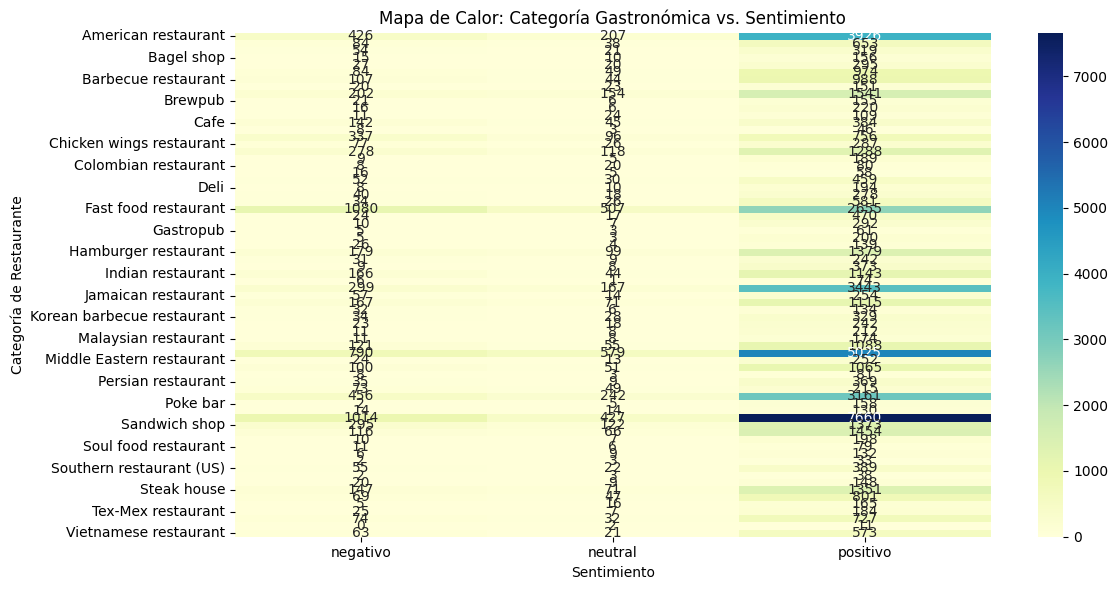

In [ ]:
# Crear tabla cruzada: categor√≠a del restaurante vs. sentimiento
tabla_categoria_sentimiento = pd.crosstab(df['categoria_restaurant'], df['sentiment_label'])

# Graficar heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(tabla_categoria_sentimiento, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Mapa de Calor: Categor√≠a Gastron√≥mica vs. Sentimiento")
plt.xlabel("Sentimiento")
plt.ylabel("Categor√≠a de Restaurante")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##Dado que el resultado carece de un an√°lisis f√°cil de observar se procede a filtrar las categor√≠as m√°s representativas (Top 10)

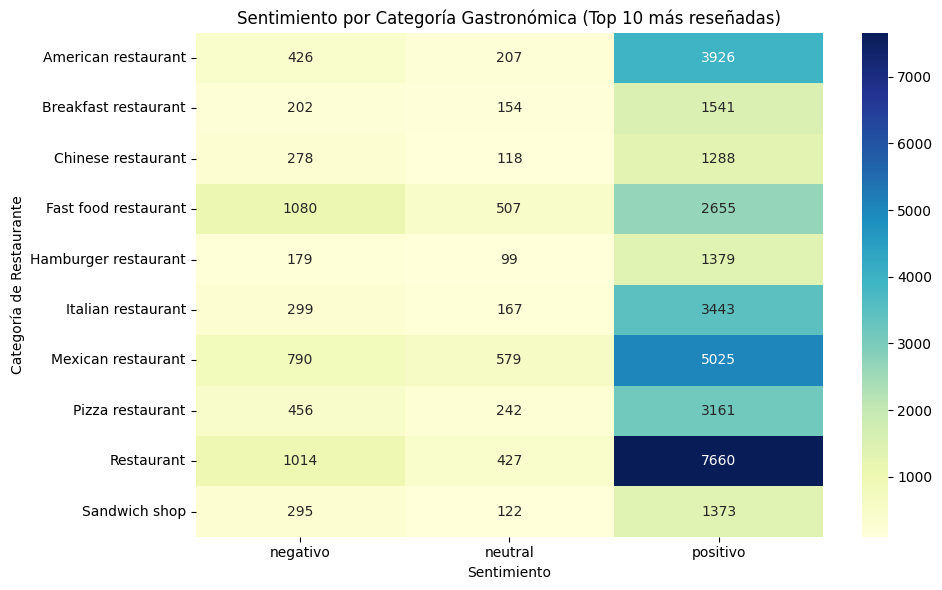

In [ ]:
# Calcular el total de rese√±as por categor√≠a
top_categorias = df['categoria_restaurant'].value_counts().head(10).index

# Filtrar el dataframe
df_top = df[df['categoria_restaurant'].isin(top_categorias)]

# Crear nuevo heatmap
tabla_top = pd.crosstab(df_top['categoria_restaurant'], df_top['sentiment_label'])

plt.figure(figsize=(10, 6))
sns.heatmap(tabla_top, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Sentimiento por Categor√≠a Gastron√≥mica (Top 10 m√°s rese√±adas)")
plt.xlabel("Sentimiento")
plt.ylabel("Categor√≠a de Restaurante")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

El an√°lisis cruzado entre sentimiento y tipo de restaurante revela que la mayor√≠a de las categor√≠as gastron√≥micas presentan una alta proporci√≥n de rese√±as positivas, consolidando la percepci√≥n general favorable ya observada en los gr√°ficos anteriores.

Entre las categor√≠as con mejor desempe√±o destacan:

"Restaurant" (categor√≠a gen√©rica) con m√°s de 7.600 rese√±as positivas, lo que sugiere una alta presencia de restaurantes bien valorados sin una subcategor√≠a espec√≠fica.

"Mexican restaurant", "Italian restaurant" y "Pizza restaurant" tambi√©n sobresalen con valores altos de satisfacci√≥n, lo que podr√≠a indicar una preferencia del p√∫blico hacia estas cocinas espec√≠ficas.

Por otro lado, "Fast food restaurant" y "Restaurant" son las √∫nicas categor√≠as donde tambi√©n se observa una proporci√≥n considerable de rese√±as negativas, lo cual puede asociarse a vol√∫menes m√°s altos de clientes y experiencias m√°s diversas.

Este tipo de an√°lisis permite detectar oportunidades y riesgos asociados a cada segmento, pudiendo orientar campa√±as de marketing, ajustes operativos y mejoras en la experiencia del cliente de manera m√°s precisa y enfocada.

##Utilizamos y analizamos tambi√©n la relaci√≥n de Puntaje de Usuario vs. Sentimiento Detectado

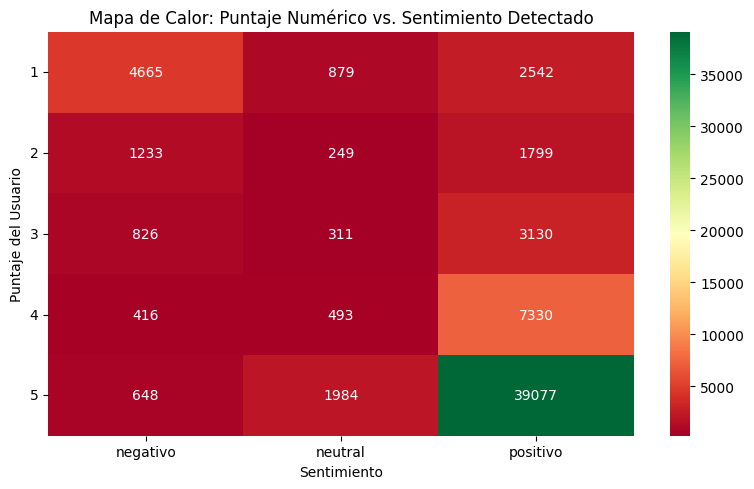

In [ ]:
# Crear tabla cruzada: puntaje vs. sentimiento
tabla_puntaje_sentimiento = pd.crosstab(df['puntaje'], df['sentiment_label'])

# Graficar heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(tabla_puntaje_sentimiento, annot=True, fmt='d', cmap='RdYlGn')
plt.title("Mapa de Calor: Puntaje Num√©rico vs. Sentimiento Detectado")
plt.xlabel("Sentimiento")
plt.ylabel("Puntaje del Usuario")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

El mapa de calor que relaciona el puntaje num√©rico de los usuarios con el sentimiento detectado en sus rese√±as permite evaluar la consistencia entre la puntuaci√≥n otorgada y el lenguaje utilizado.

Los resultados muestran una fuerte correlaci√≥n entre los puntajes altos y los sentimientos positivos:

Las rese√±as con puntuaci√≥n 5 concentran la mayor parte de los comentarios positivos, con m√°s de 39.000 menciones positivas.

Por el contrario, los puntajes 1 y 2 se asocian principalmente con sentimientos negativos, aunque se observan tambi√©n algunos casos donde el texto expresa positividad pese a una calificaci√≥n baja, lo que puede indicar:

*   Errores en el sistema de puntuaci√≥n
*   Sarcasmo textual no captado por el an√°lisis
*   Una mala experiencia aislada en un aspecto puntual

Esta visualizaci√≥n aporta valor para validar la calidad del procesamiento de sentimientos y detectar inconsistencias o sesgos en la forma en que los usuarios califican sus experiencias.

#14. Aprendizaje Supervisado con Redes Neuronales Artificiales:

En este trabajo analizamos un conjunto de rese√±as de restaurantes en Atlanta con el objetivo de comprender la percepci√≥n de los clientes a trav√©s del lenguaje que utilizan.

Utilizamos t√©cnicas de procesamiento de lenguaje natural para limpiar y estructurar los textos, identificamos patrones frecuentes mediante nubes de palabras y N-gramas, y aplicamos an√°lisis de sentimientos para detectar si los comentarios eran positivos, negativos o neutros.

A partir de estos resultados, avanzaremos a continuaci√≥n con la vectorizaci√≥n de las rese√±as usando m√©todos como Bag of Words y TF-IDF, que nos permitir√°n transformar el texto en variables num√©ricas.

Finalmente, implementaremos un modelo de clasificaci√≥n supervisado, puntualmente regresi√≥n log√≠stica, para predecir autom√°ticamente si una rese√±a reflejaba una experiencia positiva o negativa, bas√°ndonos √∫nicamente en el contenido del texto.

In [ ]:
# Instalar librer√≠as necesarias si hace falta
!pip install nltk scikit-learn

In [ ]:
# Preprocesamiento del texto
df['clean_review'] = df['texto_review'].astype(str)
df['clean_review'] = df['clean_review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['tokens'] = df['clean_review'].apply(word_tokenize)
df['tokens'] = df['tokens'].apply(lambda x: [word.lower() for word in x])
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
# Crear variable binaria a partir del puntaje
df_bin = df[df['puntaje'] != 3].copy()
df_bin['sentiment_binary'] = df_bin['puntaje'].apply(lambda x: 1 if x >= 4 else 0)
df_bin['review_text_clean'] = df_bin['tokens'].apply(lambda x: ' '.join(x))

In [ ]:
# Dividir dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df_bin['review_text_clean'], df_bin['sentiment_binary'], test_size=0.2, random_state=42)

In [ ]:
# Bag of Words (BOW)
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

In [ ]:
# Modelo con BOW
model_bow = LogisticRegression(max_iter=1000)
model_bow.fit(X_train_bow, y_train)
pred_bow = model_bow.predict(X_test_bow)

print("üéØ Evaluaci√≥n del modelo con BOW:")
print("Accuracy:", accuracy_score(y_test, pred_bow))
print("Matriz de Confusi√≥n:\n", confusion_matrix(y_test, pred_bow))
print("Reporte de Clasificaci√≥n:\n", classification_report(y_test, pred_bow))

üéØ Evaluaci√≥n del modelo con BOW:
Accuracy: 0.9515616080893745
Matriz de Confusi√≥n:
 [[1875  415]
 [ 179 9794]]
Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      2290
           1       0.96      0.98      0.97      9973

    accuracy                           0.95     12263
   macro avg       0.94      0.90      0.92     12263
weighted avg       0.95      0.95      0.95     12263



In [ ]:
# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

In [ ]:
# Modelo con TF-IDF
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train)
pred_tfidf = model_tfidf.predict(X_test_tfidf)

print("\nüéØ Evaluaci√≥n del modelo con TF-IDF:")
print("Accuracy:", accuracy_score(y_test, pred_tfidf))
print("Matriz de Confusi√≥n:\n", confusion_matrix(y_test, pred_tfidf))
print("Reporte de Clasificaci√≥n:\n", classification_report(y_test, pred_tfidf))


üéØ Evaluaci√≥n del modelo con TF-IDF:
Accuracy: 0.9534371687189106
Matriz de Confusi√≥n:
 [[1881  409]
 [ 162 9811]]
Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      2290
           1       0.96      0.98      0.97      9973

    accuracy                           0.95     12263
   macro avg       0.94      0.90      0.92     12263
weighted avg       0.95      0.95      0.95     12263



Ambos modelos logran un desempe√±o sobresaliente en la clasificaci√≥n de rese√±as como positivas o negativas. El modelo basado en TF-IDF alcanza una ligera mejora en m√©tricas clave (accuracy y precisi√≥n) en comparaci√≥n con Bag of Words, lo cual es esperable ya que TF-IDF penaliza t√©rminos comunes y resalta los m√°s informativos para el modelo.

Este resultado sugiere que el contenido textual de las rese√±as tiene alto poder predictivo sobre la percepci√≥n de los clientes, y que el modelo entrenado puede ser utilizado para monitorear autom√°ticamente nuevas opiniones en plataformas digitales, ayudando a la toma de decisiones estrat√©gicas.

##Visualizaci√≥n de resultados de Aprendizaje Supervisado

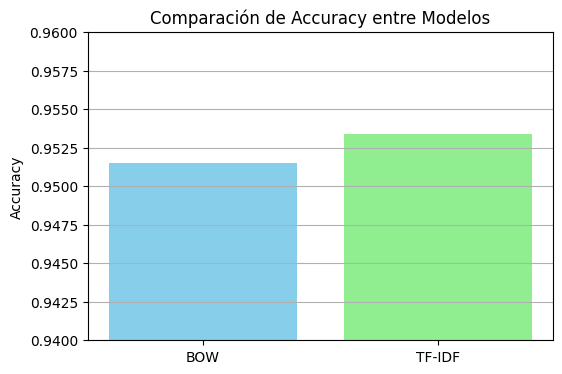

In [ ]:
# Procedemos a generar un gr√°fico para visualizar los resultados mejor
# Comparaci√≥n de Accuracy entre modelos
import matplotlib.pyplot as plt

# Datos simulados con los resultados obtenidos
modelos = ['BOW', 'TF-IDF']
accuracy = [0.9515, 0.9534]

plt.figure(figsize=(6,4))
plt.bar(modelos, accuracy, color=['skyblue', 'lightgreen'])
plt.title('Comparaci√≥n de Accuracy entre Modelos')
plt.ylabel('Accuracy')
plt.ylim(0.94, 0.96)
plt.grid(axis='y')
plt.show()

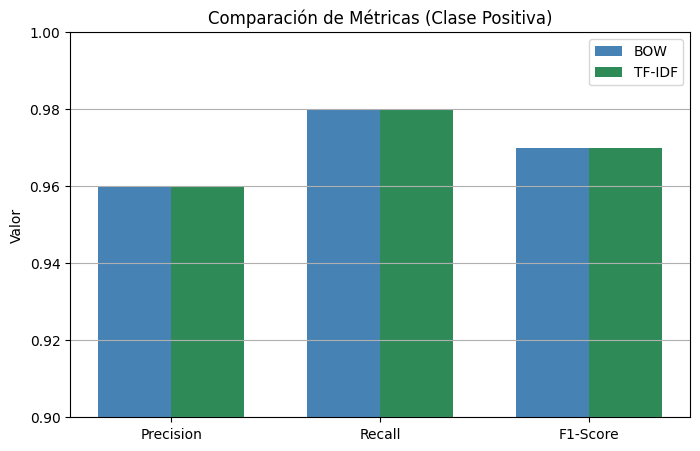

In [ ]:
# Gr√°fico comparativo de precisi√≥n, recall y f1-score por modelo

import numpy as np

# M√©tricas por clase positiva (1) para ambos modelos
metricas = ['Precision', 'Recall', 'F1-Score']
valores_bow = [0.96, 0.98, 0.97]
valores_tfidf = [0.96, 0.98, 0.97]

x = np.arange(len(metricas))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, valores_bow, width, label='BOW', color='steelblue')
plt.bar(x + width/2, valores_tfidf, width, label='TF-IDF', color='seagreen')

plt.ylabel('Valor')
plt.title('Comparaci√≥n de M√©tricas (Clase Positiva)')
plt.xticks(x, metricas)
plt.ylim(0.9, 1.0)
plt.legend()
plt.grid(axis='y')
plt.show()

Los resultados obtenidos demostraron una alta capacidad predictiva de ambos enfoques, con m√©tricas destacadas tanto en precisi√≥n como en recall. TF-IDF present√≥ un rendimiento apenas superior, lo que refuerza su eficacia al ponderar t√©rminos informativos en textos largos o repetitivos.

Este trabajo evidencia c√≥mo el an√°lisis de opiniones mediante t√©cnicas autom√°ticas puede ofrecer informaci√≥n estrat√©gica valiosa para la industria gastron√≥mica, permitiendo entender la percepci√≥n de los clientes, detectar puntos de mejora y optimizar decisiones de negocio basadas en datos reales.